<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/exercicioregressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando libs
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statistics as sts


In [ ]:
#importando dataset
notas=pd.read_excel("/Users/chenyenpin/Downloads/aprovacaoalunos.xlsx")
notas.shape


(27, 3)

In [ ]:
#sabendo se tem dados faltantes ou NA
notas.isna().sum()

UF          0
ano_2015    0
ano_2016    0
dtype: int64

In [ ]:
notas
notas.columns=["UF","2015","2016"]
notas.head(10)


,UF,2015,2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76
5,Amapa,76,75
6,Tocantins,81,82
7,Maranhao,81,81
8,Piaui,80,81
9,Ceara,86,85


In [ ]:
#entedendo as notas
notas.describe()

,2015,2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
#substituindo as abreviaturas por nome completo
notas.loc[(notas["UF"]).isin(["RN","MG","ES","RJ","SP","SC","RS","MS","MT","DF"]),"UF"]="Rio Grande do Norte","Minas Gerais", "Espirito Santo","Rio de Janeiro","Sao Paulo","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Distrito Federal"

In [ ]:
#procurando notas fora do pdrao abaixo de 0 ou acima de 100
notas.loc[(notas["2015"])<0 | (notas["2016"]>100)]

,UF,2015,2016


<AxesSubplot:xlabel='2015', ylabel='Count'>

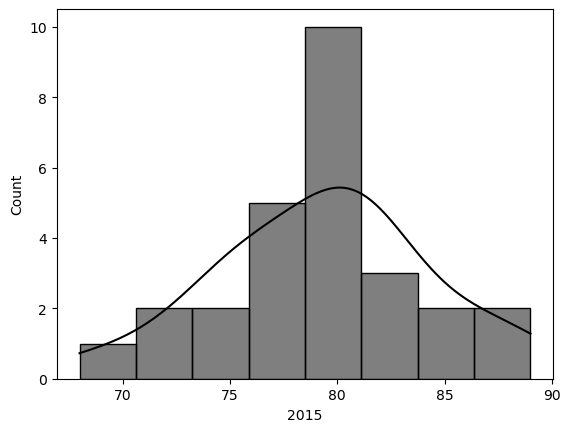

In [ ]:
#distribuicao das notas em grafico
sns.histplot(notas["2015"], kde=True, color="black", bins=8)

<AxesSubplot:xlabel='2016', ylabel='Count'>

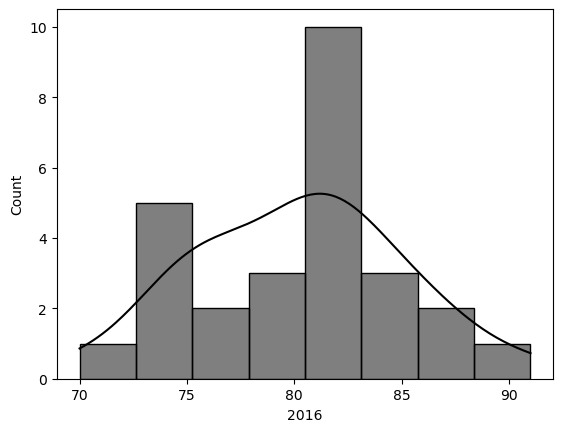

In [ ]:
sns.histplot(notas["2016"], kde=True, color="Black" ,bins=8)

<AxesSubplot:xlabel='2016', ylabel='2015'>

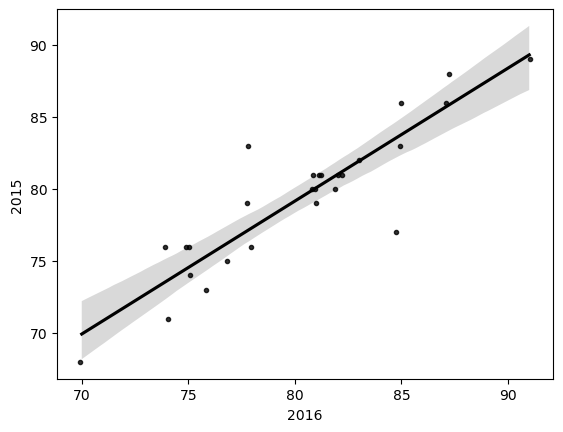

In [ ]:
sns.regplot(data=notas, x="2016", y="2015",x_jitter=0.3, fit_reg=True, color='black', marker=".")

In [ ]:
#entendendo a correlacao entre os anos
corr=notas.corr()
corr

,2015,2016
2015,1.000000,0.894957
2016,0.894957,1.000000


In [ ]:
#calculando inclinacao da reta m=r(desviopadrao x/ desviopadrao y)
std_x=sts.stdev(notas["2016"])
print(std_x)
std_y=sts.stdev(notas["2015"])
print(std_y)
corr=0.894957

4.820126371125371
4.969135507541296


In [ ]:
#m=r*(std_y/std_x)
m=corr*(std_y/std_x)
print(m)

0.9226236542392439


In [ ]:
#intercept = b
media_y=sts.mean(notas["2015"])
media_x=sts.mean(notas["2016"])
b=media_y-(media_x * m)
print(b)


5.3525847619272895


In [ ]:
y=notas["2016"]
x=sm.add_constant(notas["2015"])

In [ ]:
resultado_regeressao = sm.OLS(y,x).fit()

In [ ]:
print(resultado_regeressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 30 May 2023   Prob (F-statistic):           3.02e-10
Time:                        11:58:04   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
#prevendo regressao linear
notas["Y_Prevista"]=resultado_regeressao.predict()
notas

,UF,2015,2016,Y_Prevista
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [ ]:

notas.median()

/var/folders/s2/z2r_n2517y18_q1zxtj3m5lw0000gn/T/ipykernel_50589/889001216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  notas.median()


2015          80.000000
2016          81.000000
Y_Prevista    80.763932
dtype: float64

In [ ]:
#prevendo residuo
notas["Erro"]=notas["Y_Prevista"]-notas["2016"]
notas

,UF,2015,2016,Y_Prevista,Erro
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
5,Amapa,76,75,77.291450,2.291450
6,Tocantins,81,82,81.632053,-0.367947
7,Maranhao,81,81,81.632053,0.632053
8,Piaui,80,81,80.763932,-0.236068
9,Ceara,86,85,85.972655,0.972655


In [ ]:
tempo=[1,3,4,4,6,8,10,10,11,13]
vendas=[91,110,106,116,119,129,139,143,138,159]
list_tuple=list(zip(tempo, vendas))
dataset=pd.DataFrame(list_tuple, columns=["tempo", "vendas"])
dataset

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119
5,8,129
6,10,139
7,10,143
8,11,138
9,13,159


<AxesSubplot:xlabel='tempo', ylabel='vendas'>

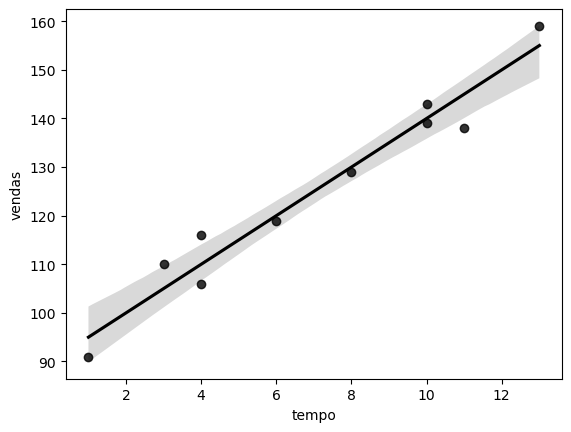

In [ ]:
sns.regplot(data=dataset, x="tempo", y="vendas",  fit_reg=True, color="black")

In [ ]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [ ]:
y=dataset["vendas"]
x=sm.add_constant(dataset["tempo"])

In [ ]:
regressor_result=sm.OLS(y,x).fit()

In [ ]:
print(regressor_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.22e-06
Time:                        14:37:28   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
dataset["Y_preview"]=regressor_result.predict()
dataset.head()

,tempo,vendas,Y_preview
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [ ]:

dataset["Residuo"]=dataset["vendas"]-dataset["Y_preview"]
dataset.sort_values()

,tempo,vendas,Y_preview,Residuo
0,1,91,95.0,-4.0
1,3,110,105.0,5.0
2,4,106,110.0,-4.0
3,4,116,110.0,6.0
4,6,119,120.0,-1.0
5,8,129,130.0,-1.0
6,10,139,140.0,-1.0
7,10,143,140.0,3.0
8,11,138,145.0,-7.0
9,13,159,155.0,4.0


In [ ]:
limite=pd.read_excel("/Users/chenyenpin/Downloads/2_11/Limite_Credito.xlsx")
limite.sort_values(by=["Idade"])
limite.columns=["Idade","Rendimento_Total","Salario","Limite_Credito_Imediato","Limite_Cheque_Especial"]

In [ ]:
limite.corr()

,Idade,Rendimento_Total,Salario,Limite_Credito_Imediato,Limite_Cheque_Especial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
Rendimento_Total,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
Limite_Credito_Imediato,0.064149,0.031041,0.081792,1.000000,0.226990
Limite_Cheque_Especial,0.075883,0.858120,0.888839,0.226990,1.000000


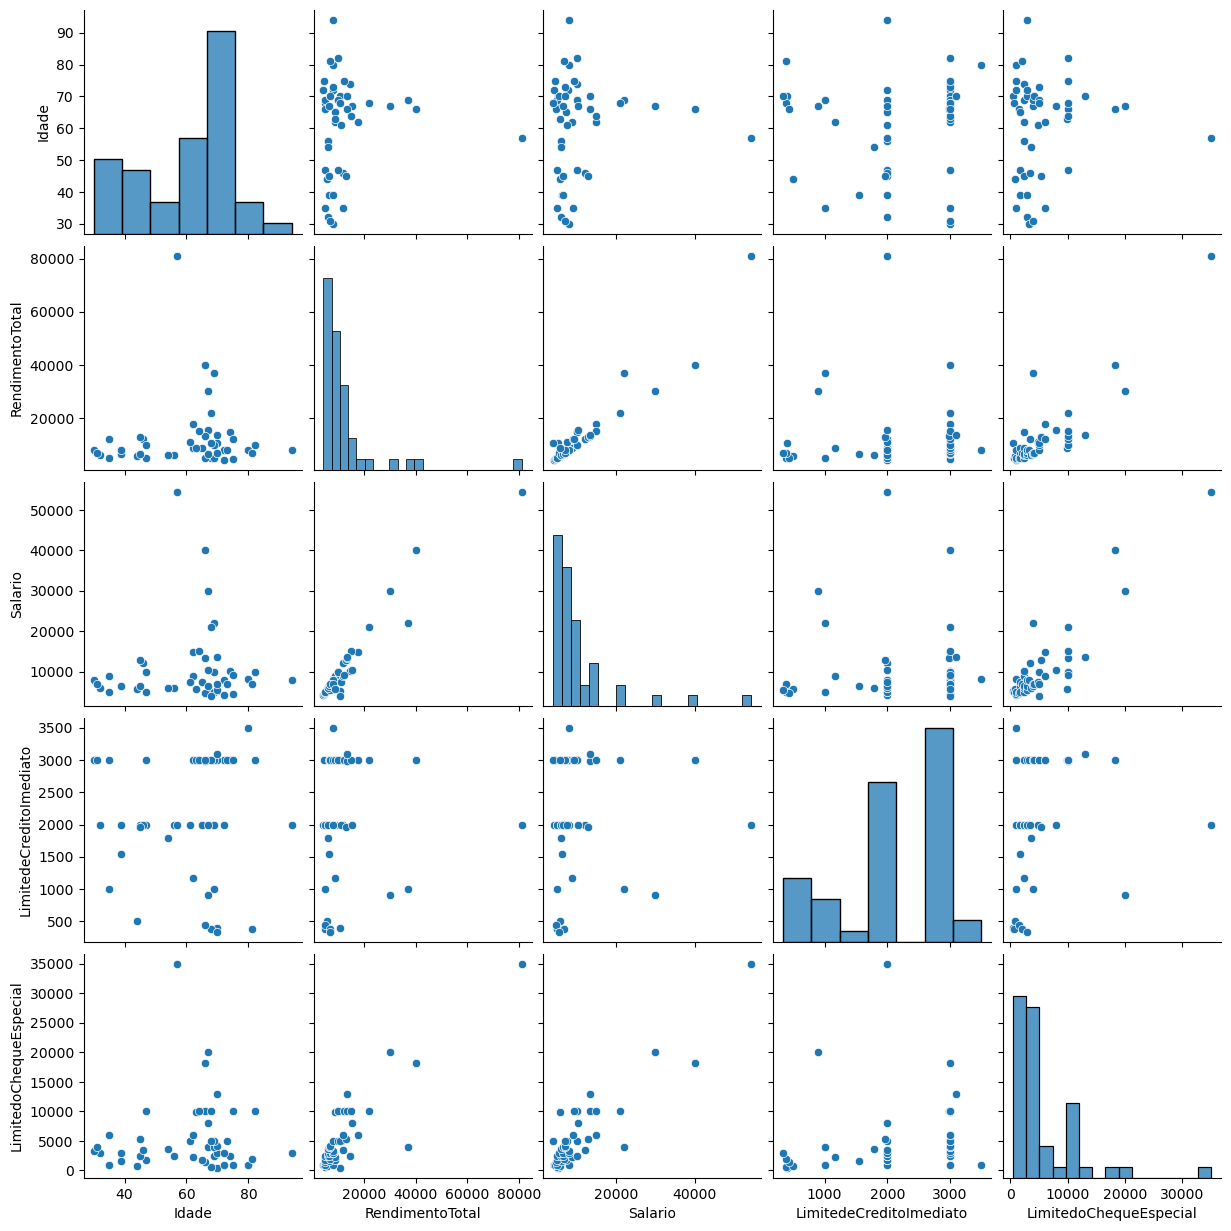

In [ ]:
sns.pairplot(limite)

In [ ]:
limite.head(2)

,Idade,Rendimento_Total,Salario,Limite_Credito_Imediato,Limite_Cheque_Especial
0,70,10736,5214,400,500
1,68,5000,5000,380,600


In [ ]:
function="Limite_Cheque_Especial~Idade+Rendimento_Total+Salario+Limite_Credito_Imediato"
model=smf.ols(formula=function,data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Limite_Cheque_Especial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Tue, 30 May 2023   Prob (F-statistic):           2.92e-15
Time:                            15:39:02   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function="Limite_Cheque_Especial~Rendimento_Total+Salario+Limite_Credito_Imediato"
model=smf.ols(formula=function,data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Limite_Cheque_Especial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Tue, 30 May 2023   Prob (F-statistic):           3.34e-16
Time:                            15:23:10   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function="Limite_Cheque_Especial~Salario+Limite_Credito_Imediato"
model=smf.ols(formula=function,data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Limite_Cheque_Especial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Tue, 30 May 2023   Prob (F-statistic):           3.66e-17
Time:                            15:20:27   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
lucro=pd.read_excel("/Users/chenyenpin/Downloads/Lucro.xlsx")
lucro.describe()
lucro.columns=["Investimento", "Mkt","Gastos_Administrativo","Lucro"]
lucro

,Investimento,Mkt,Gastos_Administrativo,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926
5,20178,28335,154806,65200
6,15506,35534,127382,69759
7,38417,148001,96190,71498
8,27893,164471,84711,77799
9,41128,172796,118546,78240


In [ ]:
lucro.corr()

,Investimento,Mkt,Gastos_Administrativo,Lucro
Investimento,1.000000,0.661913,0.243497,0.896767
Mkt,0.661913,1.000000,-0.046715,0.716677
Gastos_Administrativo,0.243497,-0.046715,1.000000,0.200720
Lucro,0.896767,0.716677,0.200720,1.000000


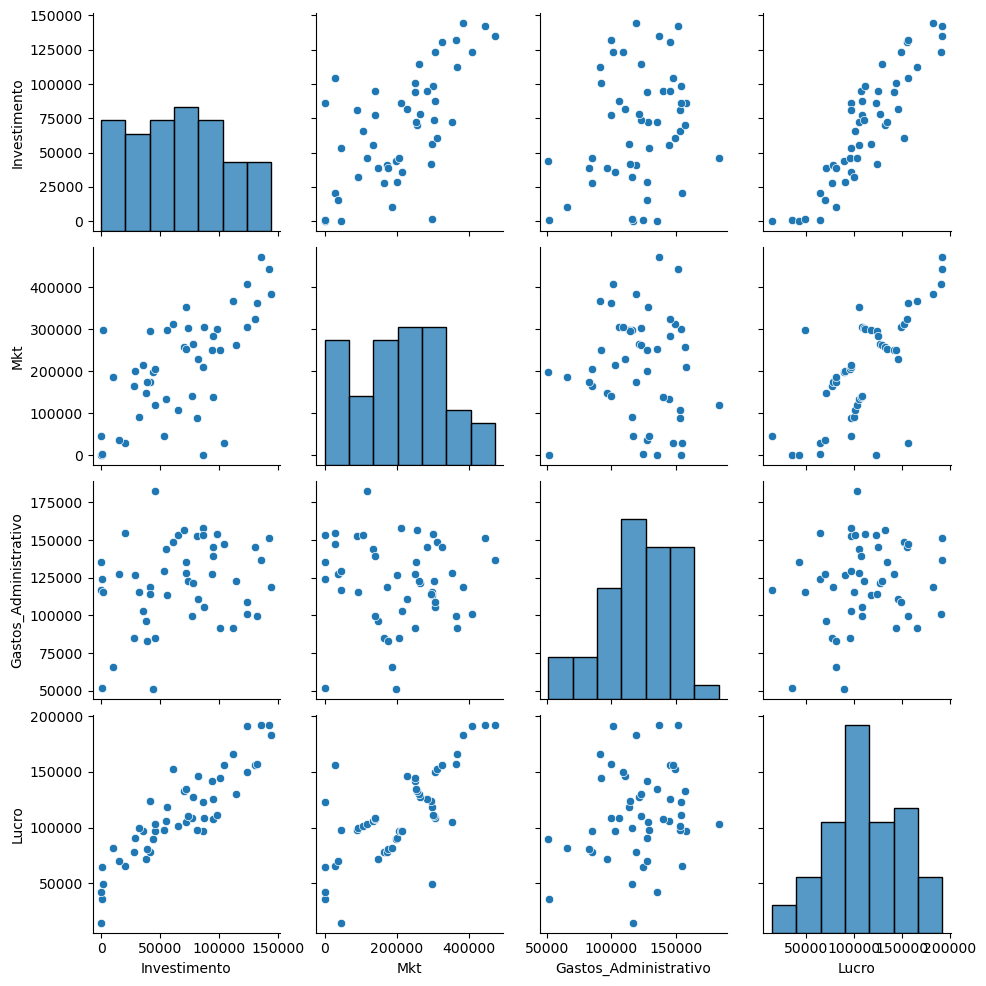

In [ ]:
sns.pairplot(lucro)

In [ ]:
#modelo backward
modelo="Lucro~Investimento+Mkt+Gastos_Administrativo"
treino=smf.ols(formula=modelo,data=lucro).fit()
print(treino.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     75.97
Date:                Tue, 30 May 2023   Prob (F-statistic):           7.60e-18
Time:                        15:37:14   Log-Likelihood:                -556.05
No. Observations:                  50   AIC:                             1120.
Df Residuals:                      46   BIC:                             1128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.217e+

In [ ]:
modelo="Lucro~Investimento+Mkt"
treino=smf.ols(formula=modelo,data=lucro).fit()
print(treino.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Tue, 30 May 2023   Prob (F-statistic):           7.01e-19
Time:                        15:38:24   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.758e+04   5004.534      9.507   